# Identifying bias in Machine Learning models

Let's test our model on groups of people from different skin color, ethnic groups, age etc.

We have provided some sample images in **./bias** folder. 
 - *bias/database* folder contains images of a single person with the image name identifying the person
 - *bias/test* folder contains images with multiple people that may or may not be in the database.

You can add your own images too.

In [6]:
import numpy as np
from skimage.feature import hog
from skimage import data, exposure
import face_recognition

from PIL import Image, ImageEnhance, ImageDraw
import IPython.display
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

font_config = {'size': 30}
fig_config = {'figsize': (12, 8)}
line_config = {'linewidth': 4}
plt.rc('font', **font_config)
plt.rc('figure', **fig_config)
plt.rc('lines', **line_config)

rc = {"axes.spines.left" : False,
      "axes.spines.right" : False,
      "axes.spines.bottom" : False,
      "axes.spines.top" : False,
      "xtick.bottom" : False,
      "xtick.labelbottom" : False,
      "ytick.labelleft" : False,
      "ytick.left" : False}
plt.rcParams.update(rc)

Given an image, detect and display images. 
The code below uses HoG method. You can try the CNN model too.

I found 5 face(s) in this photograph.


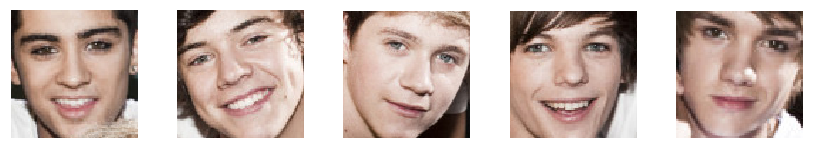

In [6]:
# Load unknown image
unknown_img_path ="bias/test/1d.jpg"
image = face_recognition.load_image_file(unknown_img_path)

# Find and plot all the faces in the image using the face_locations()


Now match against the database to recognize the people. We use the compare faces API.
You can try compare faces with a threshold, comparing distances or k-Nearest Neighbours method too.

Loading people from database.
Loaded 23 people from database.


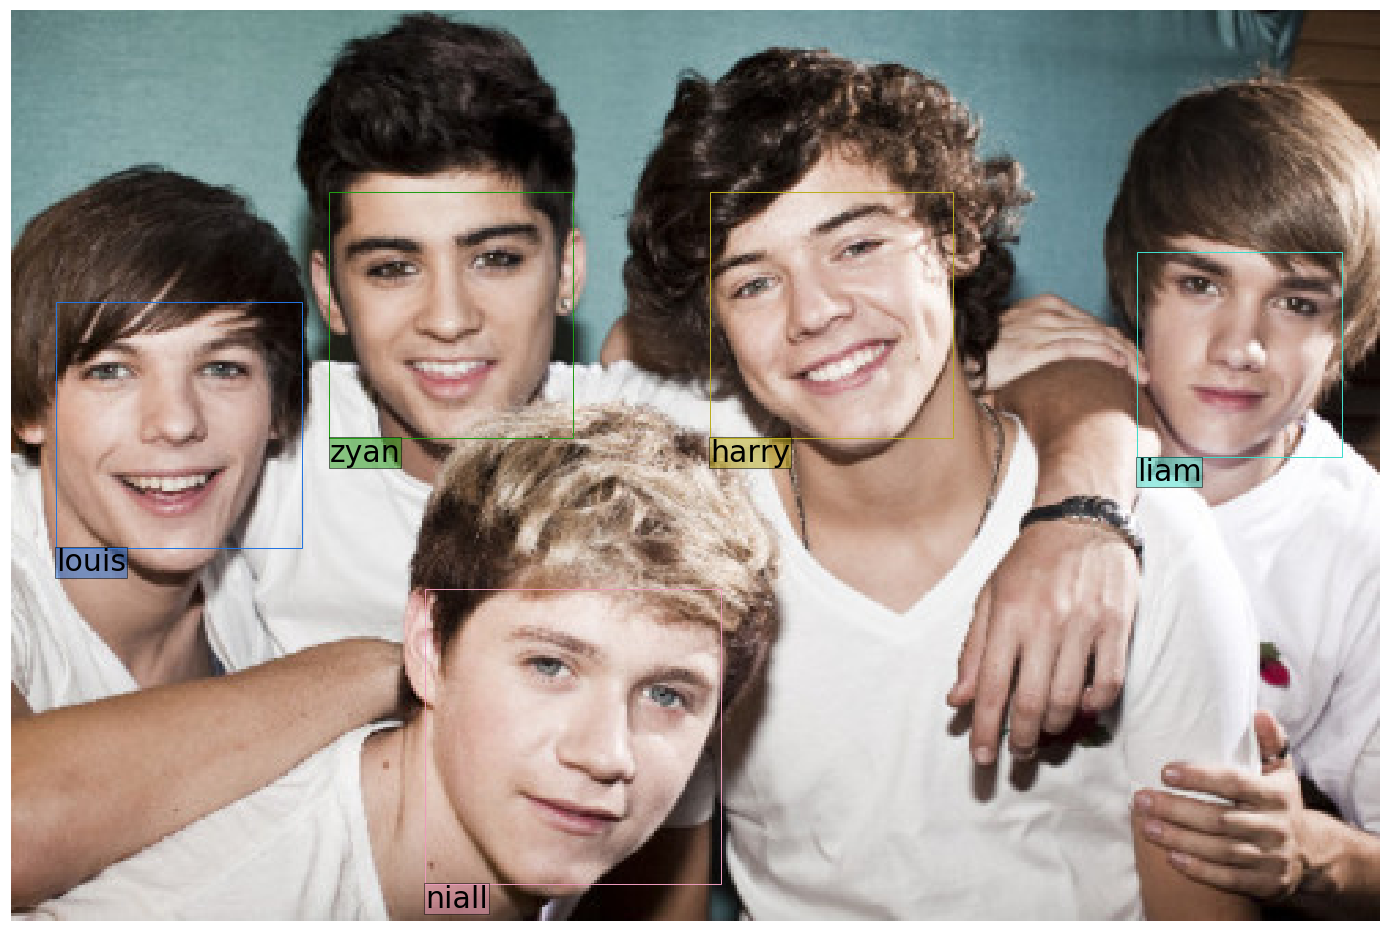

In [8]:
import math
import os
import os.path 
import pickle

from face_recognition.face_recognition_cli import image_files_in_folder

ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg'}

# Load known images from a given folder. Each image contains one person 
# and the image name identified the person.
train_dir = 'bias/database'
person_encodings = []
person_names = []

print("Loading people from database.")

# Loop through each person in the database and generate encoding
for img_path in image_files_in_folder(train_dir):
    image = face_recognition.load_image_file(img_path)
    face_bounding_boxes = face_recognition.face_locations(image)
    img_name = os.path.split(img_path)[1].split('.')[0]

    if len(face_bounding_boxes) != 1:
        # If there are no people (or too many people) in a training image, skip the image.
        if verbose:
            print("Image {} not suitable for training: {}".format(img_path, "Didn't find a face" if len(face_bounding_boxes) < 1 else "Found more than one face"))
    else:
        # Add face encoding for current image to the training set
        person_encodings.append(face_recognition.face_encodings(image, known_face_locations=face_bounding_boxes)[0])
        person_names.append(img_name)

print("Loaded {} people from database.".format(len(person_names)))
       
        
unknown_image = face_recognition.load_image_file(unknown_img_path)

# Find and label all the faces in the unknown image


Run the code for all the images in bias/test folder

Let's discuss our observations.
1. Did you identify the biases in predictions?
2. Can you identify the portion of the algorithm that is biased?
3. How good/bad are the pedictions compared your brain?

Let's discuss what we can do to address the issues you identified.
1. How would you control bias if you can design all the modules from scratch?
2. How would you control bias, if you cannot change the already trained modules of the algorithm?

* From the above solutions, what is the most accurate or cost-effective?
* What are the applications of face-recognition? What is the impact of bias if these models are used?